In [1]:
from matplotlib.pyplot import xlabel, ylabel, plot, legend, title, rcParams
from numpy import arange, cos, pi, zeros

In [2]:
rcParams['figure.figsize'] = (10.0, 4.0)

# Octaves

Let's start with a simple plot: the central A frequency at 440 Hz.

In [3]:
f = 440.
T = 1/f
T * 1000

2.2727272727272725

If the sound wave oscillates at a frequency of 440 Hz, every oscillation takes 2.27 ms.

Text(0,0.5,'amplitude of sound wave')

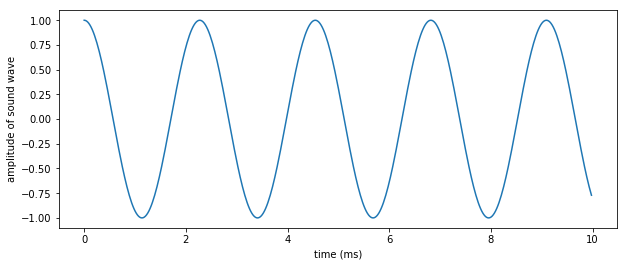

In [4]:
t = arange(0, 10e-3, 1 / 100. / f)
plot(t*1e3, cos(2 * pi * f * t))
xlabel("time (ms)")
ylabel("amplitude of sound wave")

What if we plot the octave frequency? This looks like this.

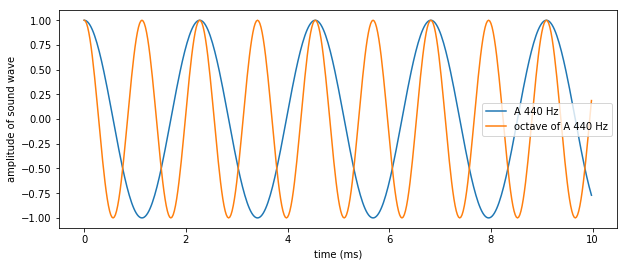

In [5]:
t = arange(0, 10e-3, 1 / 100. / f)
plot(t*1e3, cos(2 * pi * f * t), label='A 440 Hz')
plot(t*1e3, cos(2 * pi * 2 * f * t), label='octave of A 440 Hz')
xlabel("time (ms)")
ylabel("amplitude of sound wave")
legend()

But of course, our ear perceives both contributions together. So the signal our ear hears is the following:

Text(0.5,1,'Fundamental and octave together')

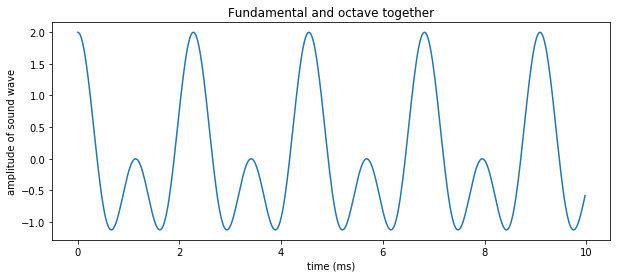

In [6]:
s1 = cos(2 * pi * f * t)
s2 = cos(2 * pi * 2 * f * t)
plot(t * 1e3, s1 + s2)
xlabel("time (ms)")
ylabel("amplitude of sound wave")
title("Fundamental and octave together")

We can extend this reasoning and plot what it looks like when we have all the harmonics of a frequency together up to order $n$.

In [7]:
def octave(f, n, t):
    s = zeros(t.shape)
    for i in range(1, n + 1):
        s += cos(2 * pi * i * f * t)
    return s / s.max()             

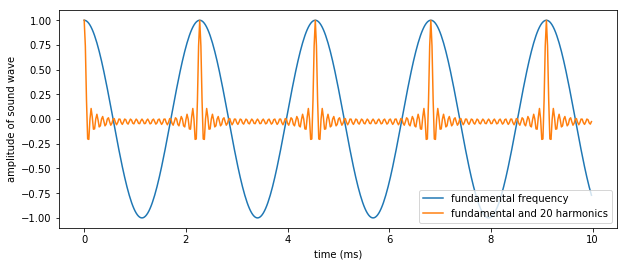

In [8]:
plot(t * 1e3, octave(f, 1, t), label='fundamental frequency')
plot(t * 1e3, octave(f, 20, t), label='fundamental and 20 harmonics')
xlabel("time (ms)")
ylabel("amplitude of sound wave")
legend()

What we see in the plot above is that the more harmonics we put in the signal, the narrower the location of the maximum amplitude gets. It feels intuitive that the ear has an easier time to identify fundamental frequencies using this "narrower" information.

# Fifths

The fifth of A (E) has a frequency that's 1.5 times higher than A. Let's plot them together.

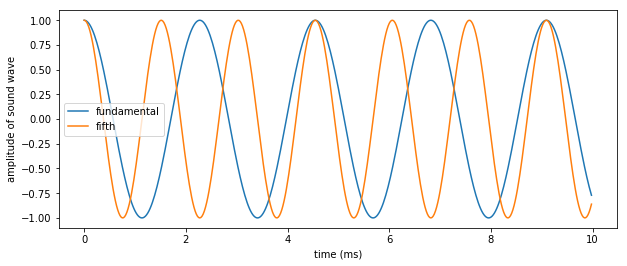

In [9]:
plot(t * 1e3, octave(f, 1, t), label='fundamental')
plot(t * 1e3, octave(f * 1.5, 1, t), label='fifth')
xlabel("time (ms)")
ylabel("amplitude of sound wave")
legend()

Due to the 3/2 frequency ratio, the fifth only sums every three oscillations with every second oscillation of the fundamental frequency.
But what does the waveform our ear listens to look like? Answer below:

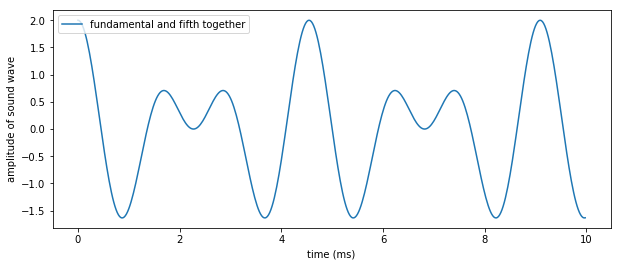

In [10]:
plot(t * 1e3, octave(f, 1, t) + octave(f * 1.5, 1, t), label='fundamental and fifth together')
xlabel("time (ms)")
ylabel("amplitude of sound wave")
legend()

How does this compare to the octave interval?

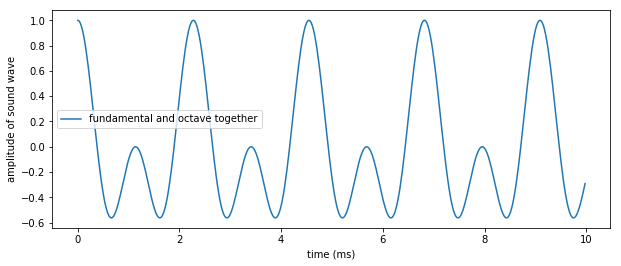

In [11]:
plot(t * 1e3, octave(f, 2, t), label='fundamental and octave together')
xlabel("time (ms)")
ylabel("amplitude of sound wave")
legend()

As one can see, the fundamental and octave have minima between the repetitions of the main frequency while the fundamental fifth interval has intermediate maxima.
But does this hold true if we plot octaves of both the fundamental and the fifth?

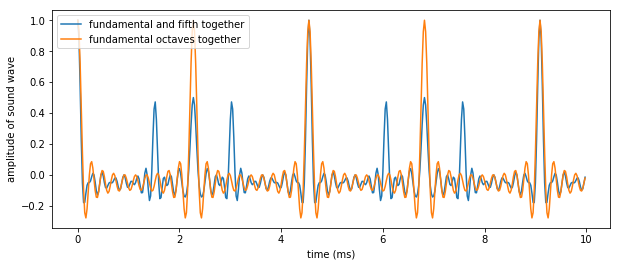

In [12]:
plot(t * 1e3, 0.5 * (octave(f, 10, t) + octave(f * 1.5, 10, t)), label='fundamental and fifth together')
plot(t * 1e3, octave(f, 10, t), label='fundamental octaves together')
xlabel("time (ms)")
ylabel("amplitude of sound wave")
legend()

#To-do list

- examine beatings
- record guitar sound and post analysis of that sound
- apply STFT, Gabor transform and spectrogram from [http://en.wikipedia.org/wiki/Time%E2%80%93frequency_analysis_for_music_signals](http://en.wikipedia.org/wiki/Time%E2%80%93frequency_analysis_for_music_signals)